# Programming Exercise 1: Linear Regression with One Variable

> En este ejercicio, implementará la regresión lineal y verá cómo funciona con los datos.

## 1. Linear Regression with One Variable

>En esta parte del ejercicio, se imprementara regresión lineal con una variable para predecir la nota obtenida de un estudiante segun el tiempo de estudio invertido en Bogota.

El archivo ex1data1.txt contiene el conjunto de datos para nuestro problema de regresión lineal. La primera columna representa las horas de estudio de un estudiante en bogota  y la segunda columna representa la nota final obtenida en la ciudad de bogota.

### 1.1 Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\LILI\\Downloads\\horas_estudio_vs_nota_final_bogota_.csv")  
df.columns = ['Horas_estudio', 'Notal_final']
df.head()

,Horas_estudio,Notal_final
0,14,4.5
1,2,1.9
2,8,3.8
3,19,5.0
4,7,3.0


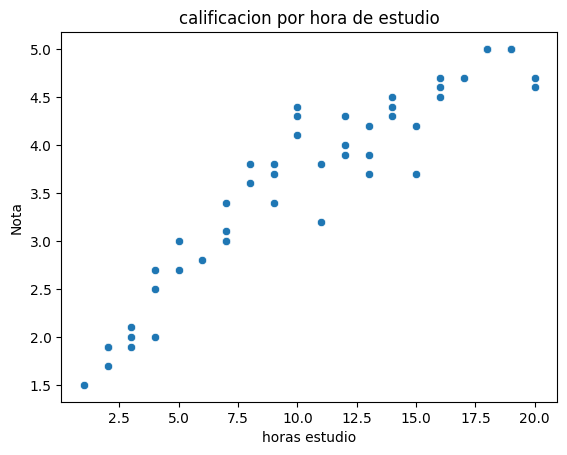

In [3]:
ax = sns.scatterplot(x='Horas_estudio', y='Notal_final', data=df)
ax.set(xlabel='horas estudio', ylabel='Nota', title='calificacion por hora de estudio');
# Mostrar el gráfico
plt.show()

La trama muestra que tienen una relación lineal.

### 1.2 Gradient Descent

Fit the linear regression parameters $\theta$ to the dataset using gradient descent

#### 1.2.1 Ecuaciones


 hipothesis of  regresión linear es :

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

El objetivo de la regresión lineal es minimizar la función de costo (Error Cuadrático Medio - RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

Para minimizar el costo $J(\theta)$  usaremos el algoritmo de descenso por gradiente por lotes (batch gradient descent). En cada iteración se realiza la siguiente actualización:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

(Simultaneamente  $\theta_j$ for all $j$). con cada paso tus paramestros  $\theta_j$ se acerca al valor optimo que minimiza  $J(\theta)$.

#### 1.2.2 Implementacion

Necesitamos adiocionar otra dimencion, columnas de unos para  $\theta_0$ termino del intercepto. esto permite tratar  $\theta_0$ como otra variable 

In [4]:
# Número de muestras (filas) en el DataFrame
m = df.shape[0]  # Construcción de la matriz de características X:

# Se agrega una columna de unos (para el término independiente) y se concatena con la variable 'Horas_estudio'
X = np.hstack((np.ones((m,1)), df.Horas_estudio.values.reshape(-1,1)))

# Vector de salida/etiqueta y: se convierte la columna 'Notal_final' en un vector columna
y = np.array(df.Notal_final.values).reshape(-1,1)

# Inicialización del vector de parámetros theta con ceros (dimensión: número de características + 1)
theta = np.zeros(shape=(X.shape[1],1))
# Número de iteraciones para el algoritmo de descenso por gradiente
iterations = 1500

# Tasa de aprendizaje (learning rate)
alpha = 0.01

###$$$$$ ### POr favor imprimir cada cambio 

#### 1.2.3 Calculando la Funcion de Costo $J(\theta)$

In [10]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [8]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')
#- La función devuelve el valor del costo ( J ), que indica cuán bien o mal está funcionando 
# nuestro modelo con los valores actuales de theta.
#El costo ( J ) indica qué tan bien ajusta el modelo a los datos. Para saber si es alto o bajo, considera estos puntos:
# - Costo muy alto (( J > 10 )) → El modelo está lejos de predecir correctamente.
# Costo moderado (( 1 < J \leq 10 )) → El modelo empieza a mejorar, pero aún tiene errores.
# Costo bajo (( J \approx 0 )) → La predicción es muy precisa.



With theta = [0 ; 0]
Cost computed = 7.1616
Expected cost value (approx) 32.07


In [11]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')
#- La función devuelve el valor del costo ( J ), que indica cuán bien o mal está funcionando 
# nuestro modelo con los valores actuales de theta.
#El costo ( J ) indica qué tan bien ajusta el modelo a los datos. Para saber si es alto o bajo, considera estos puntos:
# - Costo muy alto (( J > 10 )) → El modelo está lejos de predecir correctamente.
# Costo moderado (( 1 < J \leq 10 )) → El modelo empieza a mejorar, pero aún tiene errores.
# Costo bajo (( J \approx 0 )) → La predicción es muy precisa.

With theta = [-1 ; 2]
Cost computed = 189.01760000000002
Expected cost value (approx) 54.24


#### 1.2.4 GradientE Descendiente
es un algoritmo de optimización genérico que mide el gradiente local de la función de costo con respecto al parámetro $\theta$ 
y avanza en la dirección del gradiente descendente.

Algoritmo:

repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Tasa de aprendizaje demasiado pequeña: descenso de gradiente lento
* Tasa de aprendizaje demasiado grande: el descenso del gradiente puede sobrepasar el mínimo y puede no converger

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

#m: Obtiene la cantidad de datos en y.
#J_history: Un array para guardar el costo ( J ) en cada iteración, lo que nos permite visualizar cómo disminuye con el tiempo.


    for i in range(0, num_iters):
        h = X.dot(theta) #Calcula las predicciones del modelo utilizando ( h = X \cdot \theta ).
        diff_hy = h - y # diff_hy almacena la diferencia entre la predicción h y los valores reales y.



        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)
# delta calcula el gradiente (la dirección en que se debe ajustar theta).
# theta = theta - (alpha * delta.T): Actualiza los parámetros theta en cada iteración, moviéndolos en la dirección del gradiente con un paso determinado por alpha.
#j history Calcula y almacena el costo ( J ) en cada iteración, para ver cómo disminuye.

    return theta, J_history
# Devuelve theta (los valores óptimos para la regresión) y J_history (la evolución del costo).


In [13]:
#ejecuta el algoritmo de descenso por gradiente para encontrar los valores óptimos de theta en una regresión lineal.

theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
# Muestra los valores finales de theta, los cuales representan la mejor línea de ajuste para los datos.
print('Expected theta values (approx)\n -3.6303\n  1.1664')
# Presenta los valores aproximados esperados de theta, permitiendo verificar si la optimización fue exitosa.


Theta found by gradient descent:
 [[1.74620969]
 [0.1776025 ]]
Expected theta values (approx)
 -3.6303
  1.1664


In [14]:
# Resultado de Theta Found
#- Intercepto (theta[0] = 1.7462) → Representa el valor predicho cuando Horas_estudio = 0. Es el punto de inicio de la recta de regresión.
# Pendiente (theta[1] = 0.1776) → Indica cuánto cambia la Nota_final por cada hora adicional de estudio.
#  En este caso, cada hora de estudio incrementa la nota en aproximadamente 0.1776.


#### Plot the linear fit:

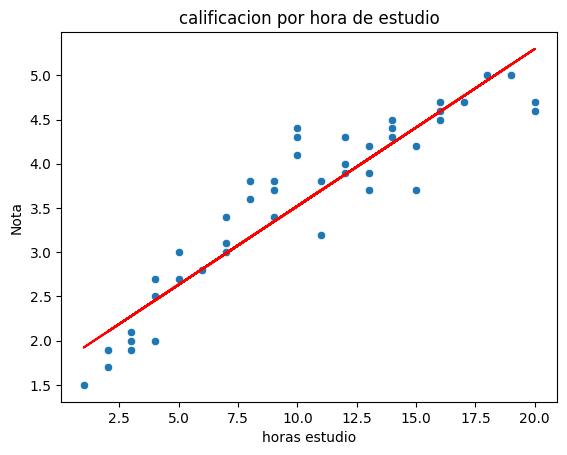

In [15]:

ax = sns.scatterplot(x='Horas_estudio', y='Notal_final', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='horas estudio', ylabel='Nota', title='calificacion por hora de estudio');

In [17]:
# Definir  cantidad de horas de estudio para hacer la predicción
horas_estudio_nueva = 8  # se puede cambiar segun se quiera

# Crear el vector de entrada
y_pred = np.array([1, horas_estudio_nueva]).dot(theta)

# Mostrar la predicción
print(f'Para {horas_estudio_nueva} horas de estudio, se predice una nota de {y_pred[0]:.2f}')

Para 8 horas de estudio, se predice una nota de 3.17


In [18]:
# Definir  cantidad de horas de estudio para hacer la predicción
horas_estudio_nueva = 10  # se puede cambiar segun se quiera

# Crear el vector de entrada
y_pred = np.array([1, horas_estudio_nueva]).dot(theta)

# Mostrar la predicción
print(f'Para {horas_estudio_nueva} horas de estudio, se predice una nota de {y_pred[0]:.2f}')

Para 10 horas de estudio, se predice una nota de 3.52


### 1.3 Visualizing $J(\theta)$

La función de costo $J(\theta)$ tiene forma de cuenco y posee un mínimo global. Este mínimo es el punto óptimo para $\theta_0$ y $\theta_1$, y cada paso del descenso por gradiente se acerca a ese punto.


In [19]:
theta0_vals = np.linspace(-10, 10, 100) #  Representa posibles valores para theta0, el término independiente en una regresión lineal.
theta1_vals = np.linspace(-1, 4, 100) # - Representa posibles valores para theta1, el coeficiente de la variable predictora

In [20]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))
# len(theta0_vals): Número de valores de theta0 (100 en este caso).
# len(theta1_vals): Número de valores de theta1 (100 en este caso).
# Esto significa que la matriz J_vals tendrá 100 filas y 100 columnas


In [21]:
for i in range(0, len(theta0_vals)):  # Recorre todos los valores de theta0
    for j in range(0, len(theta1_vals)):  # Recorre todos los valores de theta1
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]]) # Calcula el costo para cada combinación de theta0 y theta1


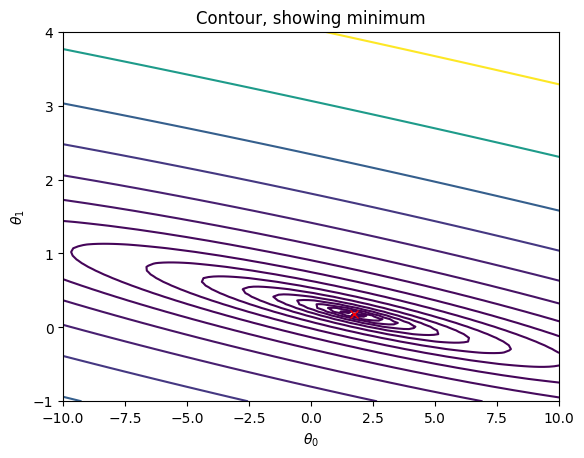

In [16]:
#grafica de contorno que muestra cómo varía la función de costo ( J(\theta) ) en función de los valores de ( \theta_0 ) y ( \theta_1 )

ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');
plt.show()

### 1.4 Usando sklearn

Intercepto (theta_0): 1.816761904761904
Coeficiente (theta_1): 0.17238095238095244


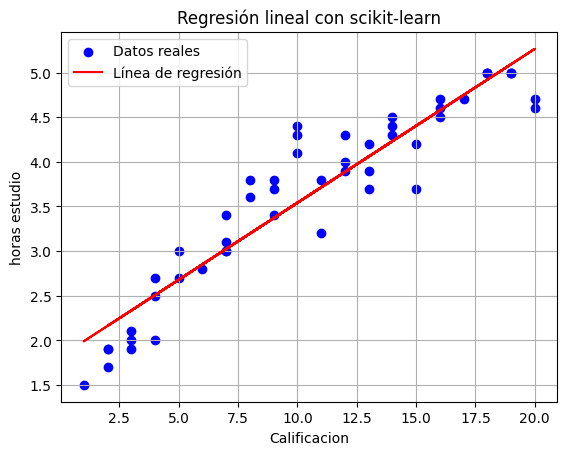

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos
df = pd.read_csv("C:\\Users\\LILI\\Downloads\\horas_estudio_vs_nota_final_bogota_.csv")  
df.columns = ['Horas_estudio', 'Notal_final']

# Preparar X e y
X = df[['Horas_estudio']]  # variable independiente (característica)
y = df['Notal_final']        # variable dependiente (objetivo)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Mostrar parámetros del modelo
print(f"Intercepto (theta_0): {model.intercept_}")
print(f"Coeficiente (theta_1): {model.coef_[0]}")

# Predicción de valores ajustados
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Calificacion')
plt.ylabel('horas estudio')
plt.title('Regresión lineal con scikit-learn')
plt.legend()
plt.grid(True)
plt.show()

### 1.4 Usando statsmodels

                            OLS Regression Results                            
Dep. Variable:            Notal_final   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     366.6
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           4.08e-24
Time:                        21:53:08   Log-Likelihood:                -18.130
No. Observations:                  50   AIC:                             40.26
Df Residuals:                      48   BIC:                             44.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8168      0.108     16.849

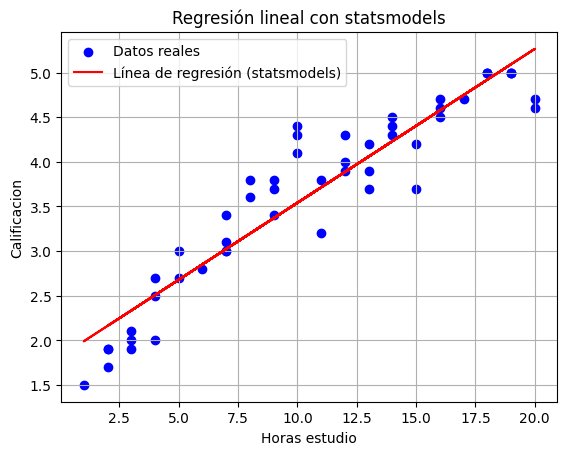

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("C:\\Users\\LILI\\Downloads\\horas_estudio_vs_nota_final_bogota_.csv")  
df.columns = ['Horas_estudio', 'Notal_final']

# Variable independiente (con constante añadida) y dependiente
X = sm.add_constant(df['Horas_estudio'])  # Agrega una columna de 1s para el intercepto (theta_0)
y = df['Notal_final']

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(model.summary())

# Predicciones
df['y_pred'] = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(df['Horas_estudio'], df['Notal_final'], color='blue', label='Datos reales')
plt.plot(df['Horas_estudio'], df['y_pred'], color='red', label='Línea de regresión (statsmodels)')
plt.xlabel('Horas estudio')
plt.ylabel('Calificacion')
plt.title('Regresión lineal con statsmodels')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Validacion de supuertos de Modelos 


Shapiro-Wilk test (normalidad):
  Estadístico: 0.9816, p-valor: 0.6226
  ✔️ Los residuos parecen normales (no se rechaza H0).

Breusch-Pagan test (homocedasticidad):
  LM Statistic: 0.1785
  LM p-value: 0.6727
  F-statistic: 0.1720
  F p-value: 0.6802
  ✔️ No hay evidencia fuerte de heterocedasticidad.

Durbin-Watson (ya en el resumen):     0.1724


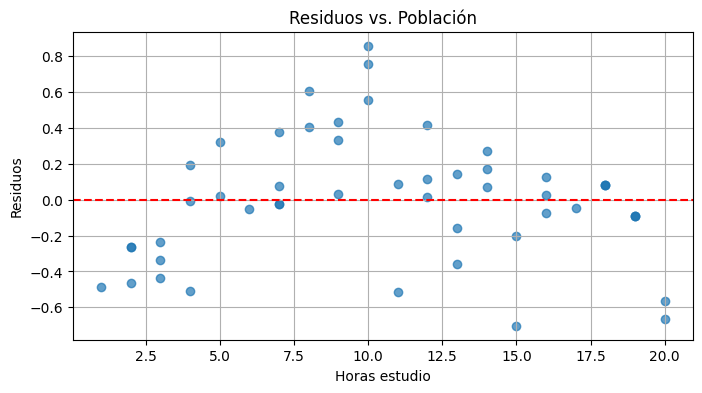

In [26]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
# Obtener residuos
residuals = model.resid

# --- 1. Normalidad de los residuos ---
shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk test (normalidad):")
print(f"  Estadístico: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("  ✔️ Los residuos parecen normales (no se rechaza H0).")
else:
    print("  ❌ Los residuos no parecen normales (se rechaza H0).")

# --- 2. Homocedasticidad (varianza constante) ---
bp_test = het_breuschpagan(residuals, X)
bp_labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
print("\nBreusch-Pagan test (homocedasticidad):")
for label, value in zip(bp_labels, bp_test):
    print(f"  {label}: {value:.4f}")
if bp_test[1] > 0.05:
    print("  ✔️ No hay evidencia fuerte de heterocedasticidad.")
else:
    print("  ❌ Posible heterocedasticidad (varianza no constante).")

# --- 3. Autocorrelación ---
print(f"\nDurbin-Watson (ya en el resumen): {model.summary().tables[1].data[2][1]}")

# --- (Opcional) Graficar residuos ---
plt.figure(figsize=(8, 4))
plt.scatter(df['Horas_estudio'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Población")
plt.xlabel("Horas estudio")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

##  Crear el Q-Q plot

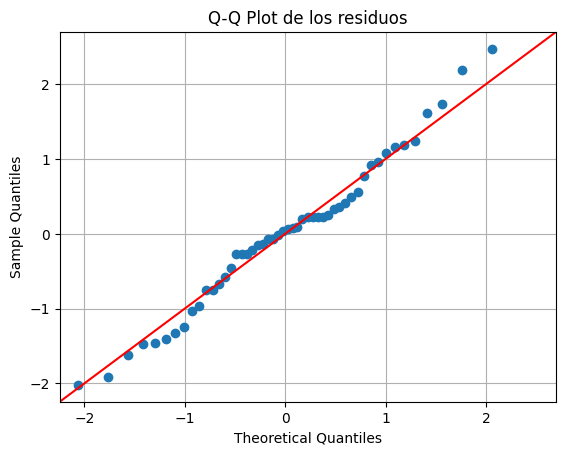

In [27]:
# Crear el Q-Q plot
sm.qqplot(residuals, line='45', fit=True)

plt.title("Q-Q Plot de los residuos")
plt.grid(True)
plt.show()

## 2. Linear Regression with Multiple Variables

> En esta parte, implementará una regresión lineal con múltiples variables para predecir los precios de las viviendas. Suponga que está vendiendo su casa y desea saber cuál sería un buen precio de mercado. Una forma de hacerlo es recopilar información sobre las casas vendidas recientemente y crear un modelo de precios de vivienda. El archivo ex1data2.txt contiene un conjunto de entrenamiento de precios de vivienda en Portland, Oregón. La primera columna representa el tamaño de la casa (en pies cuadrados), la segunda el número de habitaciones y la tercera el precio de la vivienda.

### 2.1 Feature Normalization

In [28]:
url = 'https://raw.githubusercontent.com/damasoer/MACHINE-LEARNING-I/main/data/ex1data2.txt'
df2 = pd.read_csv(url, sep=",", header=None)
df2.columns = ['house_size', 'bedrooms', 'house_price']
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


> Al observar los valores, note que los tamaños de las casas son aproximadamente 1000 veces mayores que el número de habitaciones. Cuando las características difieren por órdenes de magnitud, se realiza escalado d(escalado de características) previamente puede hacer que el descenso por gradiente converja mucho más rápido .

Podemos acelerar el descenso por gradiente si hacemos que cada uno de nuestros valores de entrada esté, idealmente, en un rango similar  $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Escala de características: implica dividir los valores de entrada por el rango (es decir, el valor máximo menos el valor mínimo) de la variable de entrada.
* Normalización de media: implica restar el valor promedio de una variable de entrada de los valores de esa variable de entrada

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.

In [ ]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [ ]:
X_norm, mu, sigma = feature_normalize(df2[['house_size', 'bedrooms']])

In [ ]:
df2['house_size_normalized'] = X_norm[:,0]
df2['bedrooms_normalized'] = X_norm[:,1]
df2[['house_size_normalized', 'bedrooms_normalized']].describe().T

### 2.2 Gradient Descent

La única diferencia con el problema de regresión univariada es que ahora hay una característica más en la matriz X. La función de hipótesis y la regla de actualización del descenso por gradiente por lotes permanecen sin cambios.

Nota: En el caso multivariable, la función de costo también puede escribirse en la siguiente forma vectorizada:

$$J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)$$

In [ ]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

#### 2.2.1 Seleccionando Tasa de aprendizaje 

Consejos:
* Haz una gráfica con el número de iteraciones en el eje x. Ahora grafica la función de costo, $J(\theta)$, sobre el número de iteraciones del descenso por gradiente. Si $J(\theta)$ alguna vez aumenta, entonces probablemente necesites disminuir $\alpha$.
* Declara convergencia si $J(\theta)$ disminuye menos de E en una iteración, donde E es un valor pequeño como $10^{−3}$.


In [ ]:
m = df2.shape[0]
X2 = np.hstack((np.ones((m,1)),X_norm))
y2 = np.array(df2.house_price.values).reshape(-1,1)
theta2 = np.zeros(shape=(X2.shape[1],1))

In [ ]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

In [ ]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X2, y2, theta2, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [ ]:
iterations = 250
alpha = 0.1
theta2, J_history = gradient_descent(X2, y2, theta2, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

##### Estima el precio de una casa de 1650 pies cuadrados con 3 habitaciones.

In [ ]:
sqft = (1650 - mu[0])/sigma[0]
bedrooms = (3 - mu[1])/sigma[1]
y_pred = theta2[0] + theta2[1]*sqft + theta2[2]*bedrooms
f'precio de una casa de 1650 pies cuadrados con 3 habitaciones: {y_pred[0]}$'

### 2.3 Normal Equations

A closed-form solution to find $\theta$ without iteration.

$$\theta = (X^TX)^{-1}X^Ty$$

In [ ]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [ ]:
Xe = np.hstack((np.ones((m,1)),df2[['house_size', 'bedrooms']].values))
theta_e = normal_eqn(Xe, y2)
theta_e

In [ ]:
y_pred = theta_e[0] + theta_e[1]*1650 + theta_e[2]*3
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

### 2.4 Equivalent Code using Scikit-Learn

In [ ]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalización (si no tienes X_norm)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 4. Entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 5. Predicciones
y_pred = lin_reg.predict(X_test)

# 6. Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 7. Visualización
# 7. Visualización de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.grid(True)
plt.show()

In [ ]:
### 2.5 Equivalent Code using statsmodels


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que ya tienes X y y definidos como DataFrames o arrays
# X: variables independientes, y: variable dependiente

# 1. División de datos (manual o con numpy)
from sklearn.model_selection import train_test_split  # solo esta parte de sklearn para dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalización manual (opcional, si hay variables en diferente escala)
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std  # usar media y std del train

# 3. Agregar constante (intercepto)
X_train_sm = sm.add_constant(X_train_norm)
X_test_sm = sm.add_constant(X_test_norm)

# 4. Entrenar modelo con OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# 5. Imprimir resumen estadístico
print(results.summary())

# 6. Predicciones
y_pred = results.predict(X_test_sm)

# 7. Métricas de evaluación
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print("\nEvaluación del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 8. Visualización: valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Reales (Statsmodels)')
plt.grid(True)
plt.show()


#### TAREA: realizar estos mismos ejecicion para bases de datos propias o de la web, existen muchos repositorios para tal fin